In [68]:
# Importing necessary libraries
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import zscore
from matplotlib import pyplot as plt
from sklearn.metrics import jaccard_score

# Constants
path_to_dataset = "significant-earthquake-database.csv"

print ("Setup Completed!")

Setup Completed!


In [69]:
# Loading dataset
data = pd.read_csv(path_to_dataset, index_col="ID Earthquake", sep=";")
data.head()

,Flag Tsunami,Year,Month,Day,Focal Depth,EQ Primary,Mw Magnitude,Ms Magnitude,Mb Magnitude,Ml Magnitude,...,Total Effects : Missing Description,Total Effects : Injuries,Total Effects : Injuries Description,Total Effects : Damages in million Dollars,Total Effects : Damage Description,Total Effects : Houses Destroyed,Total Effects : Houses Destroyed Description,Total Effects : Houses Damaged,Total Effects : Houses Damaged Description,Coordinates
ID Earthquake,,,,,,,,,,,,,,,,,,,,,
78,NaN,334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"41.2, 19.3"
84,Tsunami,344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,SEVERE (~>$5 to $24 million),NaN,NaN,NaN,NaN,"40.3, 26.5"
9989,Tsunami,346,NaN,NaN,NaN,6.8,NaN,6.8,NaN,NaN,...,NaN,NaN,NaN,NaN,MODERATE (~$1 to $5 million),NaN,Many (~101 to 1000 houses),NaN,NaN,"41.4, 19.4"
110,NaN,438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"35.5, 25.5"
9971,Tsunami,557,NaN,NaN,NaN,7.0,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"40.9, 27.6"


In [70]:
columns = list(data.columns)
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {len(columns)}")
print("List of all columns:")
print(columns)

Number of rows: 6208
Number of columns: 42
List of all columns:
['Flag Tsunami', 'Year', 'Month', 'Day', 'Focal Depth', 'EQ Primary', 'Mw Magnitude', 'Ms Magnitude', 'Mb Magnitude', 'Ml Magnitude', 'MFA Magnitude', 'Unknown Magnitude', 'Intensity', 'Country', 'State', 'Location name', 'Region code', 'Earthquake : Deaths', 'Earthquake : Deaths Description', 'Earthquake : Missing', 'Earthquake : Missing Description', 'Earthquake : Injuries', 'Earthquake : Injuries Description', 'Earthquake : Damage (in M$)', 'Earthquake : Damage Description', 'Earthquakes : Houses destroyed', 'Earthquakes : Houses destroyed Description', 'Earthquakes : Houses damaged', 'Earthquakes : Houses damaged Description', 'Total Effects : Deaths', 'Total Effects : Deaths Description', 'Total Effects : Missing', 'Total Effects : Missing Description', 'Total Effects : Injuries', 'Total Effects : Injuries Description', 'Total Effects : Damages in million Dollars', 'Total Effects : Damage Description', 'Total Effects 

## About Dataset

### Context
The Significant Earthquake Database is a global listing of over 6,200 earthquakes from 2150 BC to the present.

### Content
A significant earthquake is classified as one that meets at least one of the following criteria: caused deaths, caused moderate damage (approximately 1 million dollars or more), magnitude 7.5 or greater, Modified Mercalli Intensity (MMI) X or greater, or the earthquake generated a tsunami. The database provides information on the date and time of occurrence, latitude and longitude, focal depth, magnitude, maximum MMI intensity, and socio-economic data such as the total number of casualties, injuries, houses destroyed, and houses damaged, and $ dollage damage estimates. References, political geography, and additional comments are also provided for each earthquake. If the earthquake was associated with a tsunami or volcanic eruption, it is flagged and linked to the related tsunami event or significant volcanic eruption.

### Columns

#### Basic Earthquake Info
<ul>
    <li>Focal Depth - depth of epicenter in kilometers</li>
    <li>EQ Primary - magnitude of earthquake (primary measured magnitude) from 1 to 10</li>
    <li>Intensity - modified Mercalli intensity from 1 to 12</li>
    <li>Flag Tsunami - true if tsunami earthquake trigged tsunami</li>
</ul>

#### Date
<ul>
    <li>Year</li>
    <li>Month</li>
    <li>Day</li>
</ul>

#### Location
<ul>
    <li>Coordinates - (latitude, longitude)</li>
    <li>Country</li>
    <li>State</li>
    <li>Location name</li>
    <li>Region code</li>
</ul>

#### Magnitudes
The magnitude is a measure of seismic energy. The magnitude scale is logarithmic. An increase of one in magnitude represents a tenfold increase in the recorded wave amplitude. However, the energy release associated with an increase of one in magnitude is not tenfold, but about thirtyfold. For example, approximately 900 times more energy is released in an earthquake of magnitude 7 than in an earthquake of magnitude 5. Each increase in magnitude of one unit is equivalent to an increase of seismic energy of about 1.6 x 10,000,000,000,000 ergs.
All magnitudes have valid values between 0 and 10.

<ul>
    <li>Mw Magnitude 
    <br>
    The Mw magnitude is based on the moment magnitude scale. Moment is a physical quantity proportional to the slip on the fault times the area of the fault surface that slips; it is related to the total energy released in the EQ. The moment can be estimated from seismograms (and also from geodetic measurements). The moment is then converted into a number similar to other earthquake magnitudes by a standard formula. The result is called the moment magnitude. The moment magnitude provides an estimate of earthquake size that is valid over the complete range of magnitudes, a characteristic that was lacking in other magnitude scales.</li>
    <li>Ms Magnitude
    <br>
    The Ms magnitude is the surface-wave magnitude of the earthquake.
    </li>
    <li>Mb Magnitude
    <br>
    The Mb magnitude is the compressional body wave (P-wave) magnitude.
    </li>
    <li>Ml Magnitude
    <br>
    The ML magnitude was the original magnitude relationship defined by Richter and Gutenberg for local earthquakes in 1935. It is based on the maximum amplitude of a seismogram recorded on a Wood-Anderson torsion seismograph. Although these instruments are no longer widely in use, ML values are calculated using modern instrumentation with appropriate adjustments.
    </li>
    <li>MFA Magnitude
    <br>
    The Mfa magnitudes are computed from the felt area, for earthquakes that occurred before seismic instruments were in general use.
    </li>
    <li>Unknown Magnitude
    <br>
    The computational method for the earthquake magnitude was unknown and could not be determined from the published sources.
    </li>
</ul>

#### Earthquake Effects

<ul>
    <li>Earthquake : Deaths</li>
    <li>Earthquake : Deaths Description</li>
    <li>Earthquake : Missing</li>
    <li>Earthquake : Missing Description</li>
    <li>Earthquake : Injuries</li>
    <li>Earthquake : Injuries Description</li>
    <li>Earthquake : Damage (in M$)</li>
    <li>Earthquake : Damage Description</li>
    <li>Earthquakes : Houses destroyed</li>
    <li>Earthquakes : Houses destroyed Description</li>
    <li>Earthquakes : Houses damaged</li>
    <li>Earthquakes : Houses damaged Description</li>
</ul>

#### Total Earthquake Effects

<ul>
    <li>Total Effects : Deaths</li>
    <li>Total Effects : Deaths Description</li>
    <li>Total Effects : Missing</li>
    <li>Total Effects : Missing Description</li>
    <li>Total Effects : Injuries</li>
    <li>Total Effects : Injuries Description</li>
    <li>Total Effects : Damages in million Dollars</li>
    <li>Total Effects : Damage Description</li>
    <li>Total Effects : Houses destroyed</li>
    <li>Total Effects : Houses destroyed Description</li>
    <li>Total Effects : Houses damaged</li>
    <li>Total Effects : Houses damaged Description</li>
</ul>


## Feature Engineering

Feature Engineering will be performed for each of these column groups separately. First we will decide what columns to keeps, measure number of null values and decide what to do with them . Also we will consider does some features need to be combined in some way for better further analysis.

### Data Type and Format Conversions

#### Basic Info

In [71]:
basic_info_columns = ["Focal Depth", "EQ Primary", "Intensity", "Flag Tsunami"]
basic_data = data[basic_info_columns]
# Print tail because newer earthquakes have smaller number of null values
basic_data.tail()

,Focal Depth,EQ Primary,Intensity,Flag Tsunami
ID Earthquake,,,,
10245,26.0,6.9,9.0,Tsunami
10267,39.0,7.1,9.0,NaN
10367,10.0,5.3,NaN,NaN
10430,10.0,3.8,NaN,NaN
10515,10.0,6.6,7.0,NaN


In [72]:
basic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6208 entries, 78 to 10515
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Focal Depth   3243 non-null   float64
 1   EQ Primary    4416 non-null   float64
 2   Intensity     2826 non-null   float64
 3   Flag Tsunami  1838 non-null   object 
dtypes: float64(3), object(1)
memory usage: 242.5+ KB


In [73]:
# Numeric basic info data
basic_data.describe()

,Focal Depth,EQ Primary,Intensity
count,3243.000000,4416.000000,2826.000000
mean,41.064755,6.458084,8.283439
std,70.317966,1.045100,1.825092
min,0.000000,1.600000,2.000000
25%,10.000000,5.700000,7.000000
50%,25.000000,6.500000,8.000000
75%,40.000000,7.300000,10.000000
max,675.000000,9.500000,12.000000


In [74]:
# Categorical basic info data
basic_data["Flag Tsunami"].value_counts()

Tsunami    1838
Name: Flag Tsunami, dtype: int64

We can see that if the tsunami occured we have flag set to Tsunami and if not the flag is left to be null. We will convert this column to boolean type with values True or False. 

In [75]:
tsunamies = (basic_data["Flag Tsunami"] == "Tsunami")
basic_data = basic_data.copy()  # create a new copy of the data
basic_data.loc[:, "Flag Tsunami"] = tsunamies.values
basic_data["Flag Tsunami"].value_counts()

/tmp/ipykernel_11075/3550770302.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  basic_data.loc[:, "Flag Tsunami"] = tsunamies.values


False    4370
True     1838
Name: Flag Tsunami, dtype: int64

In [76]:
# Set these changes to original dataset
data[basic_info_columns] = basic_data

#### Location

In [77]:
location_columns = ["Coordinates", "Country", "State", "Location name", "Region code"]
location_data = data[location_columns]
location_data.tail()

,Coordinates,Country,State,Location name,Region code
ID Earthquake,,,,,
10245,"5.504, 125.066",PHILIPPINES,NaN,PHILIPPINES: SARANGANI,170.0
10267,"18.339, -98.68",MEXICO,NaN,"MEXICO: MEXICO CITY, MORELOS, PUEBLA",150.0
10367,"26.374, 90.165",INDIA,NaN,INDIA: WEST BENGAL,60.0
10430,"20.0, 72.9",INDIA,NaN,INDIA: MAHARASHTRA: PALGHAR,60.0
10515,"12.021, 124.123",PHILIPPINES,NaN,PHILIPPINES: MASBATE,170.0


In [78]:
location_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6208 entries, 78 to 10515
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Coordinates    6153 non-null   object 
 1   Country        6208 non-null   object 
 2   State          323 non-null    object 
 3   Location name  6207 non-null   object 
 4   Region code    6207 non-null   float64
dtypes: float64(1), object(4)
memory usage: 291.0+ KB


We can see that for columns in this group we have small amount of null values, except for state. Let's see what are values of that row and how usefull they will be for further analysis.

In [79]:
print("State value counts:")
print(location_data["State"].value_counts())

State value counts:
CA     103
AK      82
HI      15
PR      14
GU      14
NV       9
NY       8
TAS      8
UT       8
VI       7
BC       6
OK       6
WA       6
MT       5
MP       4
MO       3
PA       3
WY       2
AR       2
KY       2
ID       2
MA       2
CO       2
OR       2
TX       1
CT       1
NC       1
AL       1
VA       1
NH       1
IL       1
SC       1
Name: State, dtype: int64


This seems to show state where the earthquake happended in United States. To prove the theory we will check what values do we have in column country, when state field is not null.

In [80]:
print(location_data[~location_data["State"].isnull()]["Country"].value_counts())

USA              267
USA TERRITORY     39
AUSTRALIA          8
CANADA             6
MEXICO             1
BERING SEA         1
GHANA              1
Name: Country, dtype: int64


We can see that previous hypothesis is mostly true. Because of that this column will be only usefull when analysing earthquakes in USA and it will mostly be ignored in further analysis.

In [81]:
# Region code is numerical value, but it is actually categorical
print("Region code value counts:")
print(location_data["Region code"].value_counts().sort_index())
# We can convert it to integer for now
location_data = location_data.astype({"Region code": "Int16"})

Region code value counts:
10.0       75
15.0      107
20.0        4
30.0     1045
40.0      305
50.0      120
60.0      472
70.0       13
80.0        1
90.0      165
100.0     169
110.0      50
120.0     127
130.0     846
140.0     810
150.0     490
160.0     600
170.0     808
Name: Region code, dtype: int64


In [82]:
# We will split coordinates into latitude and longitude
location_data[["Latitude", "Longitude"]] = location_data["Coordinates"].str.split(",", n=1, expand=True)
location_data.astype({"Latitude": "Float64", "Longitude": "Float64"})
location_data.drop("Coordinates", axis=1, inplace=True)

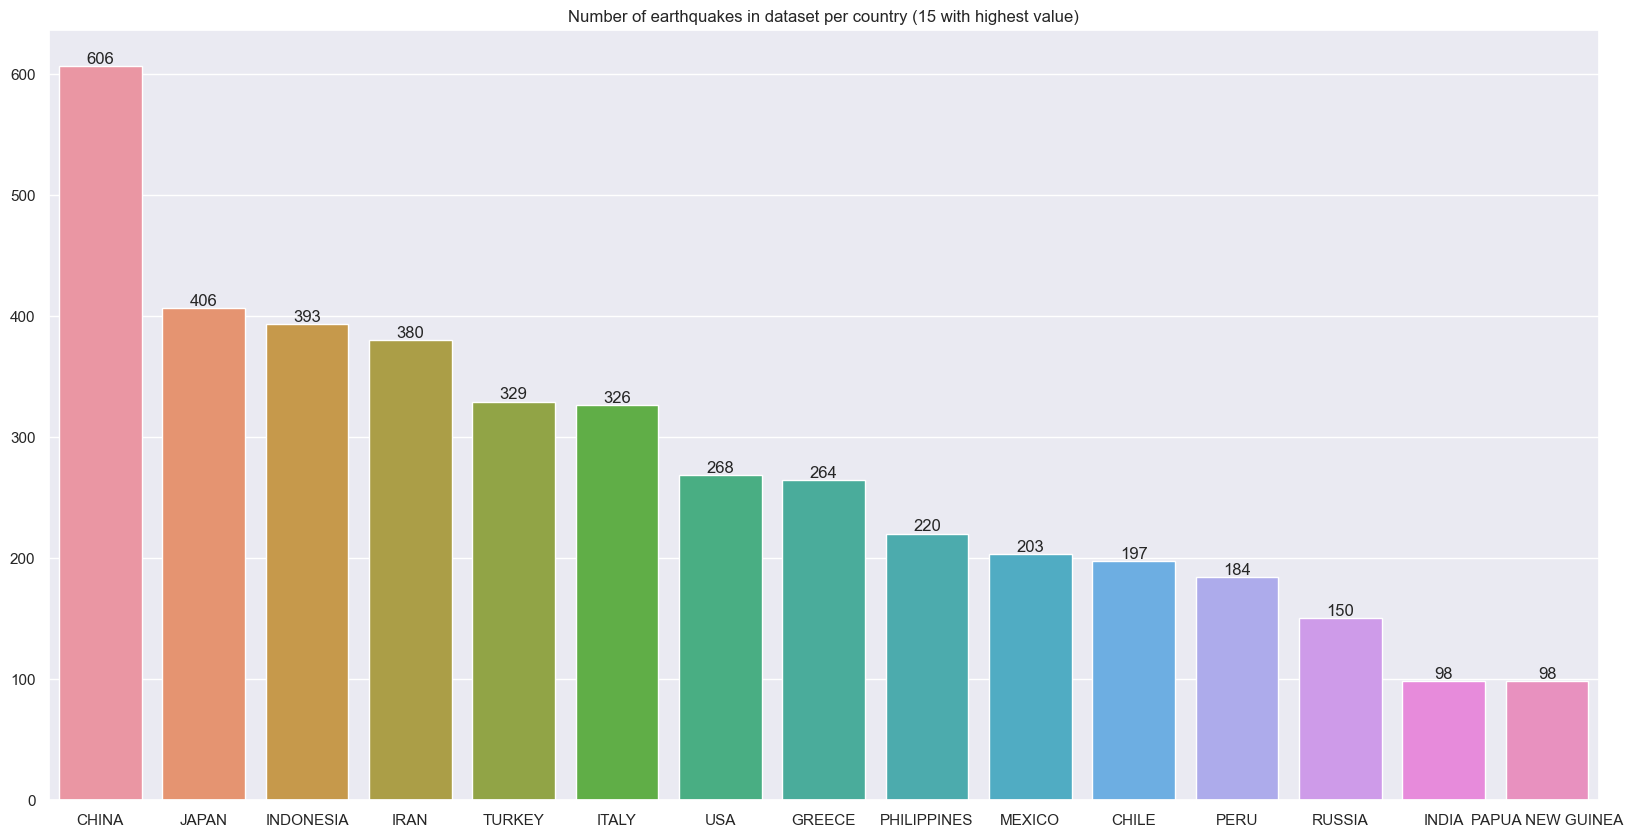

In [83]:
# Number of eartquakes by country
earthquakes_by_country = location_data["Country"].value_counts()[:15]
sns.set(font_scale=1, rc={"figure.figsize": (20, 10)})
ax = sns.barplot(x=earthquakes_by_country.index, y=earthquakes_by_country.values)
ax.bar_label(ax.containers[0])
plt.title("Number of earthquakes in dataset per country (15 with highest value)")
plt.show()


In [84]:
# Set these changes to original dataset
data.drop("Coordinates", axis=1, inplace=True)
data[location_data.columns] = location_data

#### Date data

In [85]:
date_columns = ["Year", "Month", "Day"]
date_data = data[date_columns]
date_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6208 entries, 78 to 10515
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    6208 non-null   int64  
 1   Month   5800 non-null   float64
 2   Day     5646 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 194.0 KB


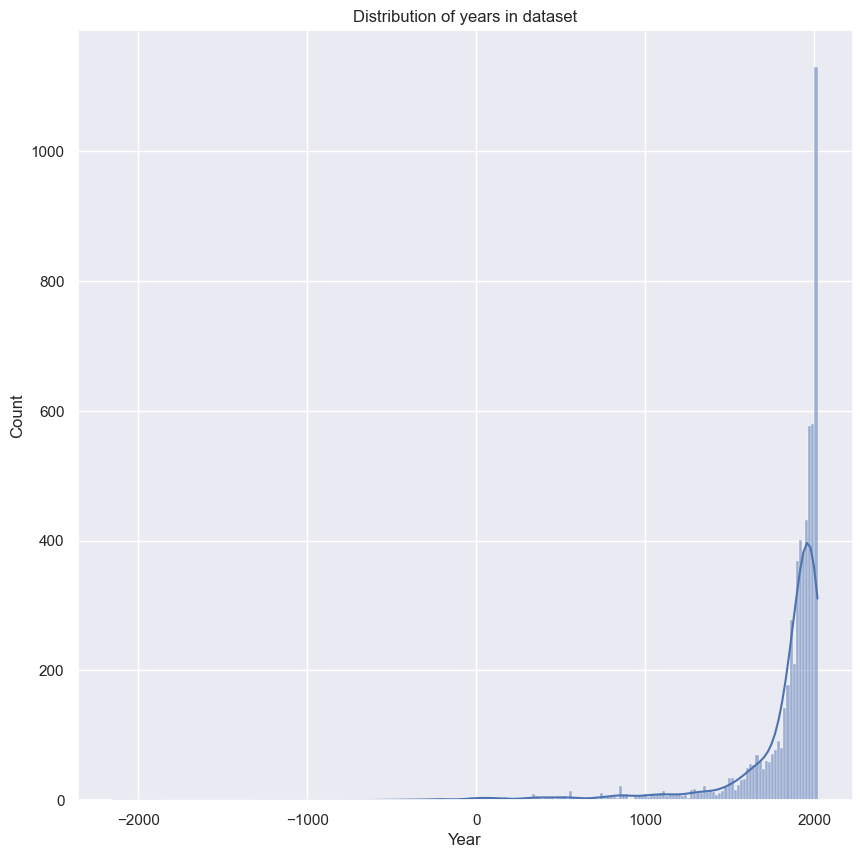

In [86]:
# We should convert month and day to be int
date_data = date_data.astype({"Month": "Int32", "Day": "Int32"})
# Plot year distribution
sns.set(font_scale=1, rc={"figure.figsize": (10, 10)})
sns.histplot(date_data["Year"], kde=True)
plt.title("Distribution of years in dataset")
plt.show()

As we can see on chart above, dataset contains much more earthquakes happened in recent years. Of cource this is because of the fact that we have more advanced technology to measure earthquakes nowadays. This is main reason to drop some older years from dataset.

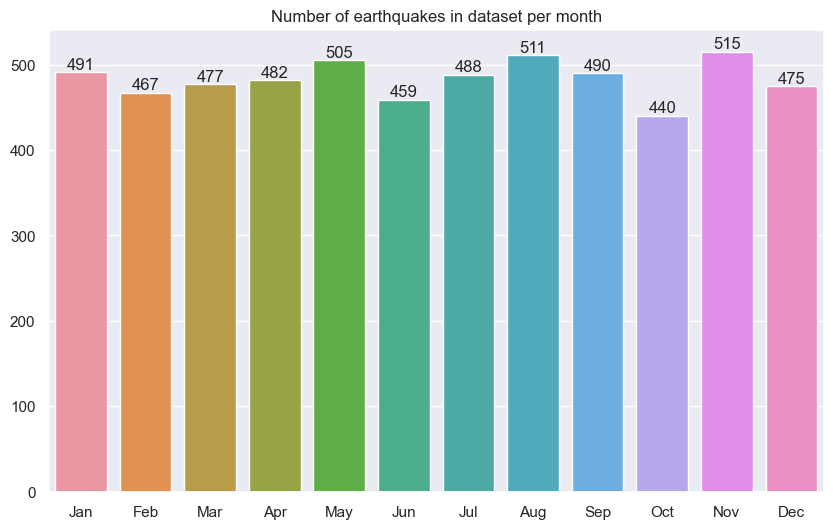

In [87]:
# Plot counts of earthquake occurence per months
def month_number_to_short(month_num):
    datetime_object = datetime.datetime.strptime(str(month_num), "%m")
    month_name = datetime_object.strftime("%b")
    return month_name

earthquakes_by_month = date_data["Month"].value_counts().sort_index()
earthquakes_by_month = earthquakes_by_month.set_axis([month_number_to_short(num) for num in earthquakes_by_month.index])
sns.set(font_scale=1, rc={"figure.figsize": (10, 6)})
ax = sns.barplot(x=earthquakes_by_month.index, y=earthquakes_by_month.values)
ax.bar_label(ax.containers[0])
plt.title("Number of earthquakes in dataset per month")
plt.show()

We can conclude that month does not influence the number of earthquakes happening, as we cannot extract some general rule from chart above.

In [88]:
# Set these changes to original dataset
data[date_columns] = date_data

#### Magnitudes

In [89]:
magnitude_columns = ["Mw Magnitude", "Ms Magnitude", "Mb Magnitude", "Ml Magnitude", "MFA Magnitude", "Unknown Magnitude"]
magnitude_data = data[magnitude_columns]
magnitude_data.tail()

,Mw Magnitude,Ms Magnitude,Mb Magnitude,Ml Magnitude,MFA Magnitude,Unknown Magnitude
ID Earthquake,,,,,,
10245,6.9,NaN,NaN,NaN,NaN,NaN
10267,7.1,NaN,NaN,NaN,NaN,NaN
10367,5.3,NaN,NaN,NaN,NaN,NaN
10430,NaN,NaN,NaN,NaN,NaN,3.8
10515,6.6,NaN,NaN,NaN,NaN,NaN


In [90]:
magnitude_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6208 entries, 78 to 10515
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mw Magnitude       1334 non-null   float64
 1   Ms Magnitude       2930 non-null   float64
 2   Mb Magnitude       1804 non-null   float64
 3   Ml Magnitude       184 non-null    float64
 4   MFA Magnitude      14 non-null     float64
 5   Unknown Magnitude  777 non-null    float64
dtypes: float64(6)
memory usage: 339.5 KB


In [91]:
magnitude_data.describe()

,Mw Magnitude,Ms Magnitude,Mb Magnitude,Ml Magnitude,MFA Magnitude,Unknown Magnitude
count,1334.000000,2930.000000,1804.000000,184.000000,14.000000,777.000000
mean,6.513193,6.574198,5.792572,5.395109,6.771429,6.652638
std,0.928359,0.990792,0.724433,1.087850,1.230027,1.007854
min,3.600000,2.100000,2.100000,1.600000,4.300000,3.200000
25%,5.800000,5.800000,5.300000,4.775000,6.225000,6.000000
50%,6.500000,6.600000,5.800000,5.450000,7.050000,6.800000
75%,7.200000,7.300000,6.300000,6.025000,7.475000,7.500000
max,9.500000,9.100000,8.200000,7.700000,8.500000,8.800000


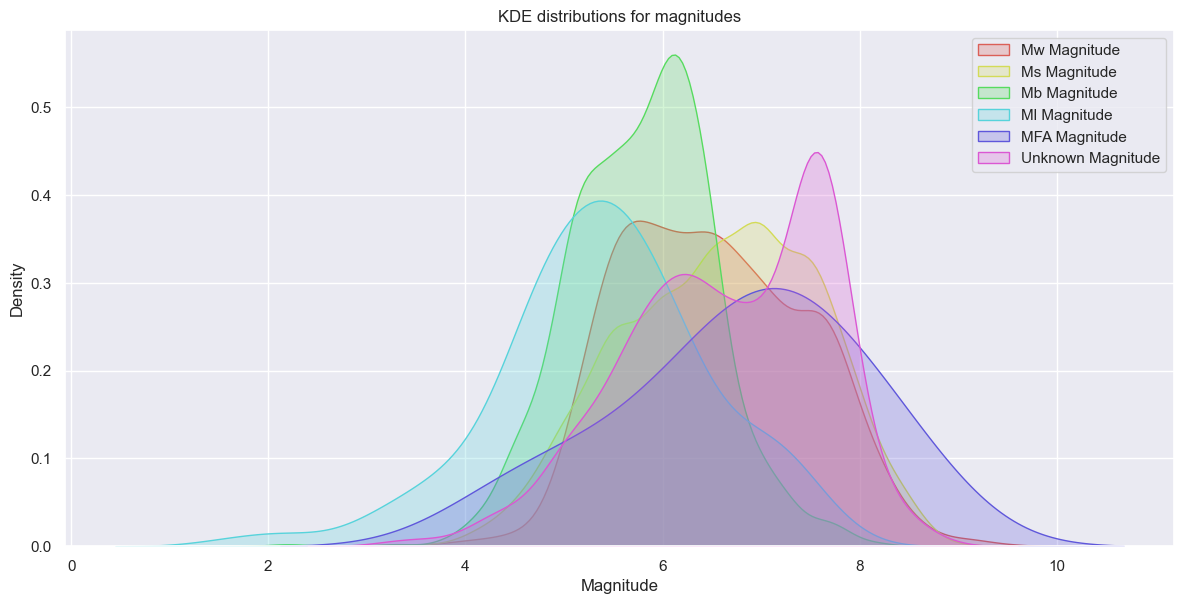

In [92]:
# Plot distributios of all magnitudes

fig, ax = plt.subplots(figsize=(12, 6))
palette = iter(sns.color_palette("hls", n_colors=len(magnitude_columns)))

for col in magnitude_columns:
    sns.kdeplot(data=magnitude_data[col],
                color=next(palette), label=col, fill=True, ax=ax)
plt.xlabel("Magnitude")
ax.legend()
plt.tight_layout()
plt.title("KDE distributions for magnitudes")
plt.show()

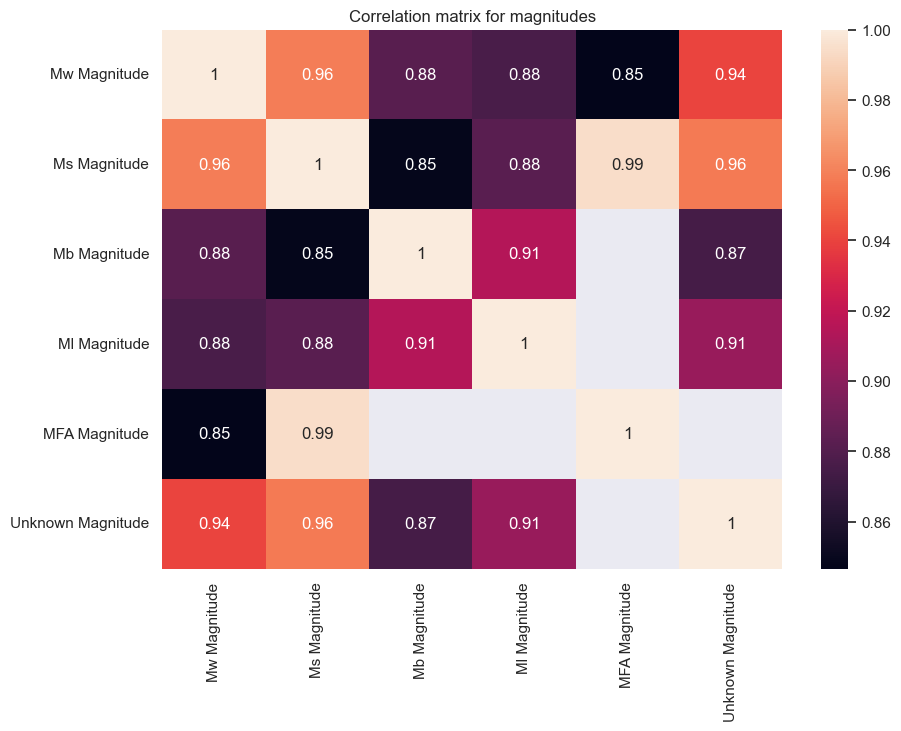

In [93]:
# Correlation between magnitudes
magnitudes_corr_matrix = magnitude_data.corr()
plt.figure(figsize=(10,7))
sns.heatmap(magnitudes_corr_matrix, annot=True)
plt.title("Correlation matrix for magnitudes")
plt.show()

As we can see from heatplot correlation between different magnitudes are very high and also their distributions does not differ a lot. Let's see which magnitude is usually taken for EQ Primary measure, but whatever scale is most used, because of high correlations, for further analysis it would probably be enough to just look at EQ Primary measure.

In [94]:
taken_indecies = []
for col in magnitude_columns:
    magnitude_taken = magnitude_data[col] == data["EQ Primary"]
    magnitude_data = magnitude_data.copy() # to suppress warning
    magnitude_data[f"{col} Taken"] = magnitude_taken
    taken_indecies.extend(magnitude_data[magnitude_data[f"{col} Taken"]].index)

not_taken = set(magnitude_data.index).difference(set(taken_indecies))
nan_values_count = data.loc[list(not_taken), "EQ Primary"].isna().sum()

if len(not_taken) == nan_values_count:
    print("All EQ Primary measures are taken from magnitudes if they are not null!")
else:
    print("Not all EQ Primary measures are taken from magnitudes if they are not null!")


All EQ Primary measures are taken from magnitudes if they are not null!


So we can claim that EQ Primary is just inferred from other magnitudes.

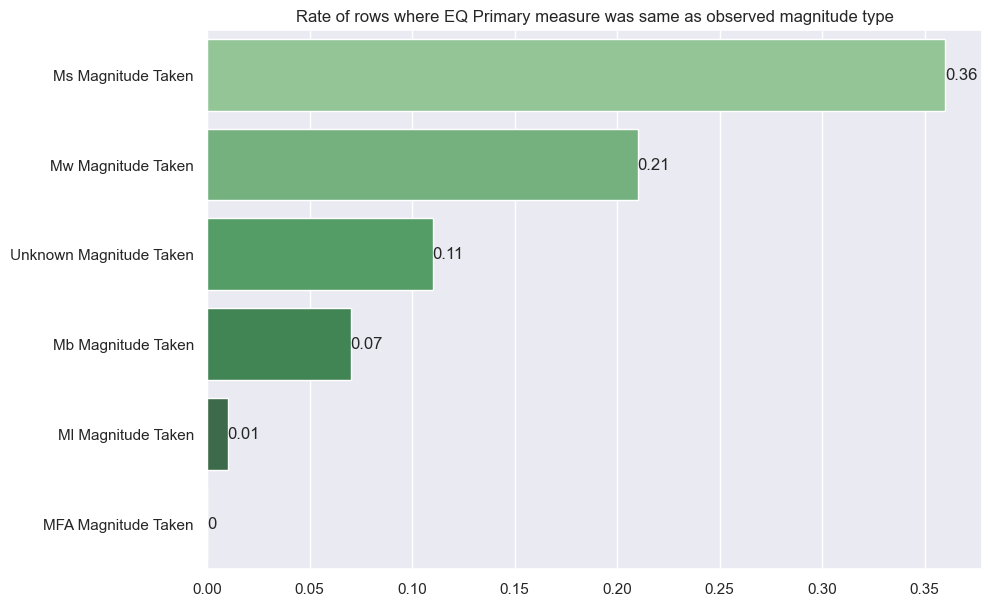

In [95]:
taken_indecies = []
for col in magnitude_columns:
    magnitude_taken = magnitude_data[col] == data["EQ Primary"]
    magnitude_data = magnitude_data.copy() # to suppress warning
    magnitude_data[f"{col} Taken"] = magnitude_taken

magnitudes_taken = magnitude_data.iloc[:, -len(magnitude_columns):]

counts = round(magnitudes_taken.sum() / magnitudes_taken.shape[0], 2)
counts = counts.sort_values(ascending=False)
sns.set(font_scale=1, rc={"figure.figsize": (10, 7)})
ax = sns.barplot(x=counts.values, y=counts.index, palette="Greens_d")
ax.bar_label(ax.containers[0])
plt.title("Rate of rows where EQ Primary measure was same as observed magnitude type")
plt.show()


From last plot we can see that Ms, Mw and Unknown magnitudes are mostly used. All of them are very highly correlated by pairs (> 0.94), so it is safe enough to observe only EQ Primary in later analysis.

#### Earthquake Effects

In [96]:
earthquake_effects_numerical_columns = [
    "Earthquake : Deaths",
    "Earthquake : Missing",
    "Earthquake : Injuries",
    "Earthquake : Damage (in M$)",
    "Earthquake : Houses Destroyed",
    "Earthquake : Houses Damaged",
]

earthquake_effects_categorical_columns =  [
    "Earthquake : Deaths Description",
    "Earthquake : Missing Description",
    "Earthquake : Injuries Description",
    "Earthquake : Damage Description",
    "Earthquake : Houses Destroyed Description",
    "Earthquake : Houses Damaged Description"
]

earthquake_effects_columns = earthquake_effects_numerical_columns + earthquake_effects_categorical_columns

# Renaming some columns for earthquake effects
data = data.rename(columns={"Earthquakes : Houses destroyed": "Earthquake : Houses Destroyed",
                    "Earthquakes : Houses damaged": "Earthquake : Houses Damaged",
                    "Earthquakes : Houses destroyed Description": "Earthquake : Houses Destroyed Description",
                    "Earthquakes : Houses damaged Description": "Earthquake : Houses Damaged Description"
                    })

earthquake_effects_data = data[earthquake_effects_columns]
earthquake_effects_data.tail()

,Earthquake : Deaths,Earthquake : Missing,Earthquake : Injuries,Earthquake : Damage (in M$),Earthquake : Houses Destroyed,Earthquake : Houses Damaged,Earthquake : Deaths Description,Earthquake : Missing Description,Earthquake : Injuries Description,Earthquake : Damage Description,Earthquake : Houses Destroyed Description,Earthquake : Houses Damaged Description
ID Earthquake,,,,,,,,,,,,
10245,NaN,NaN,5.0,NaN,1.0,NaN,NaN,NaN,Few (~1 to 50 deaths),LIMITED (roughly corresponding to less than $1...,Few (~1 to 50 houses),Few (~1 to 50 houses)
10267,369.0,NaN,6000.0,8000.000,226.0,184000.0,Many (~101 to 1000 deaths),NaN,Very Many (~1001 or more deaths),EXTREME (~$25 million or more),Many (~101 to 1000 houses),Very Many (~1001 or more houses)
10367,1.0,NaN,NaN,NaN,NaN,NaN,Few (~1 to 50 deaths),NaN,NaN,NaN,NaN,NaN
10430,1.0,NaN,NaN,NaN,NaN,NaN,Few (~1 to 50 deaths),NaN,Few (~1 to 50 deaths),LIMITED (roughly corresponding to less than $1...,NaN,Few (~1 to 50 houses)
10515,1.0,NaN,51.0,0.565,51.0,453.0,Few (~1 to 50 deaths),NaN,Some (~51 to 100 deaths),LIMITED (roughly corresponding to less than $1...,Some (~51 to 100 houses),Many (~101 to 1000 houses)


In [97]:
earthquake_effects_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6208 entries, 78 to 10515
Data columns (total 12 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Earthquake : Deaths                        2069 non-null   float64
 1   Earthquake : Missing                       21 non-null     float64
 2   Earthquake : Injuries                      1244 non-null   float64
 3   Earthquake : Damage (in M$)                511 non-null    float64
 4   Earthquake : Houses Destroyed              786 non-null    float64
 5   Earthquake : Houses Damaged                490 non-null    float64
 6   Earthquake : Deaths Description            2551 non-null   object 
 7   Earthquake : Missing Description           21 non-null     object 
 8   Earthquake : Injuries Description          1432 non-null   object 
 9   Earthquake : Damage Description            4446 non-null   object 
 10  Earthquake : Houses De

In [98]:
earthquake_effects_data.describe()

,Earthquake : Deaths,Earthquake : Missing,Earthquake : Injuries,Earthquake : Damage (in M$),Earthquake : Houses Destroyed,Earthquake : Houses Damaged
count,2069.000000,21.000000,1244.000000,511.000000,7.860000e+02,4.900000e+02
mean,3748.109715,2182.761905,2173.584405,1252.089894,1.762395e+04,2.513319e+04
std,25333.721982,9463.737100,26271.351391,6733.908952,1.971549e+05,2.496489e+05
min,1.000000,1.000000,1.000000,0.013000,1.000000e+00,1.000000e+00
25%,3.000000,5.000000,10.000000,3.950000,6.425000e+01,9.000000e+01
50%,22.000000,21.000000,40.000000,22.000000,5.060000e+02,6.605000e+02
75%,305.000000,114.000000,200.000000,200.000000,4.000000e+03,3.465250e+03
max,830000.000000,43476.000000,799000.000000,100000.000000,5.360000e+06,5.360000e+06


From this statistics we can see taht for this group we have a lot of null values. <br>
Also, worth noticing is that maximum amount of casualties from earthquake effects is 830000 people.
Let's see what earthquake caused this amount of casualties.

In [99]:
data.iloc[data["Earthquake : Deaths"].argmax()]

Flag Tsunami                                                               False
Year                                                                        1556
Month                                                                          1
Day                                                                           23
Focal Depth                                                                  NaN
EQ Primary                                                                   8.0
Mw Magnitude                                                                 NaN
Ms Magnitude                                                                 8.0
Mb Magnitude                                                                 NaN
Ml Magnitude                                                                 NaN
MFA Magnitude                                                                NaN
Unknown Magnitude                                                            NaN
Intensity                   

Plotting univariate distributions


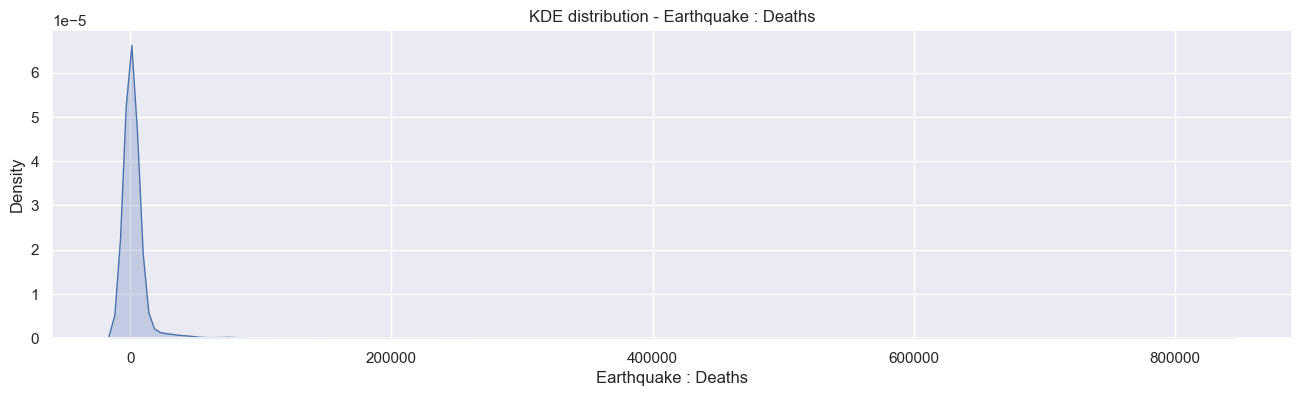

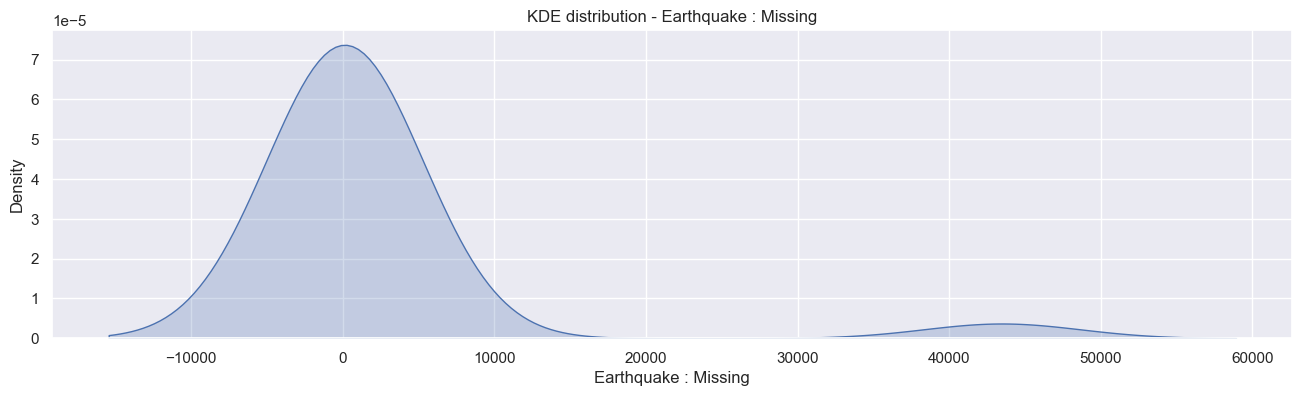

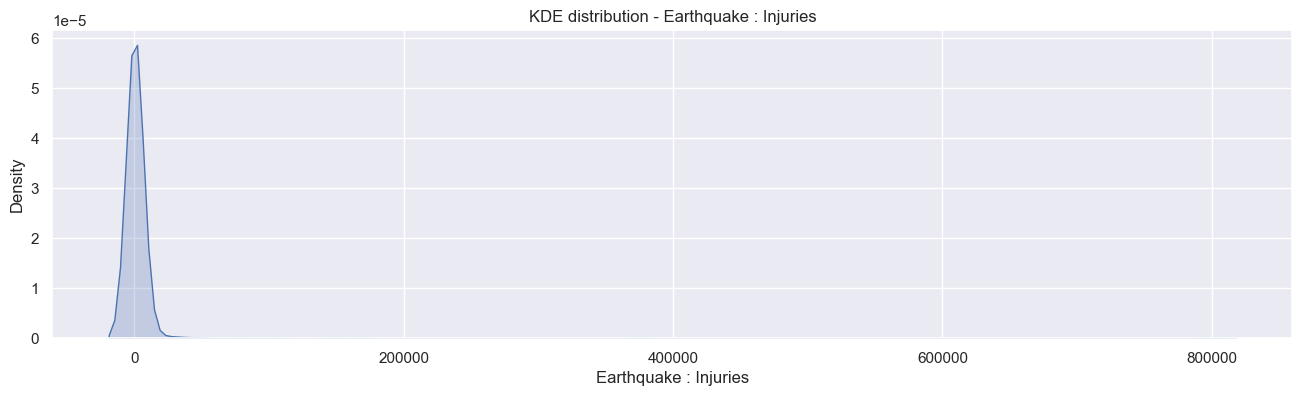

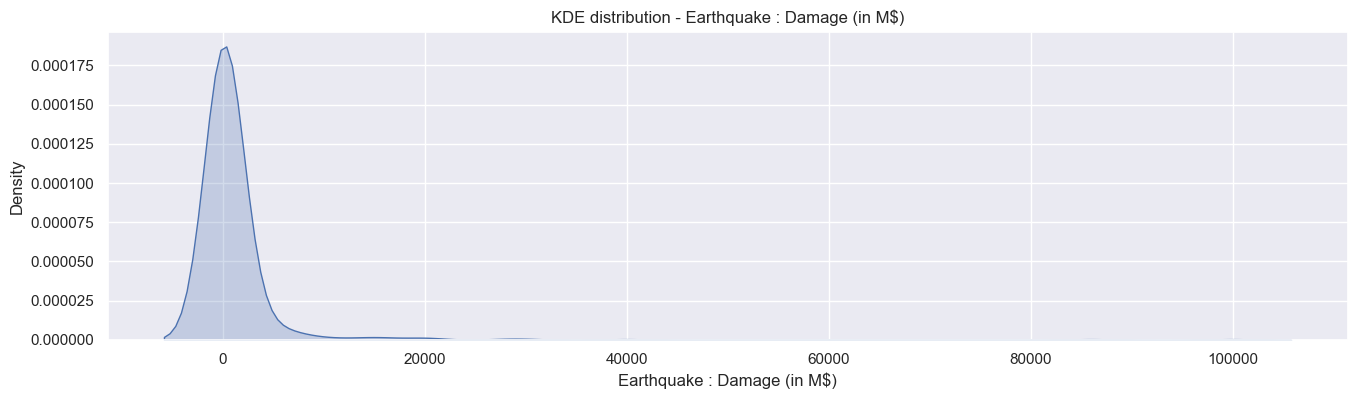

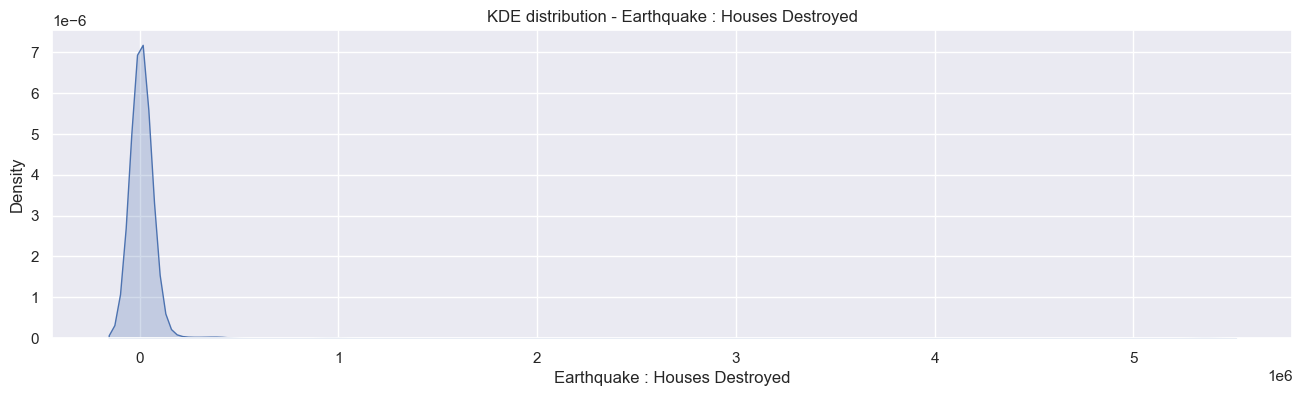

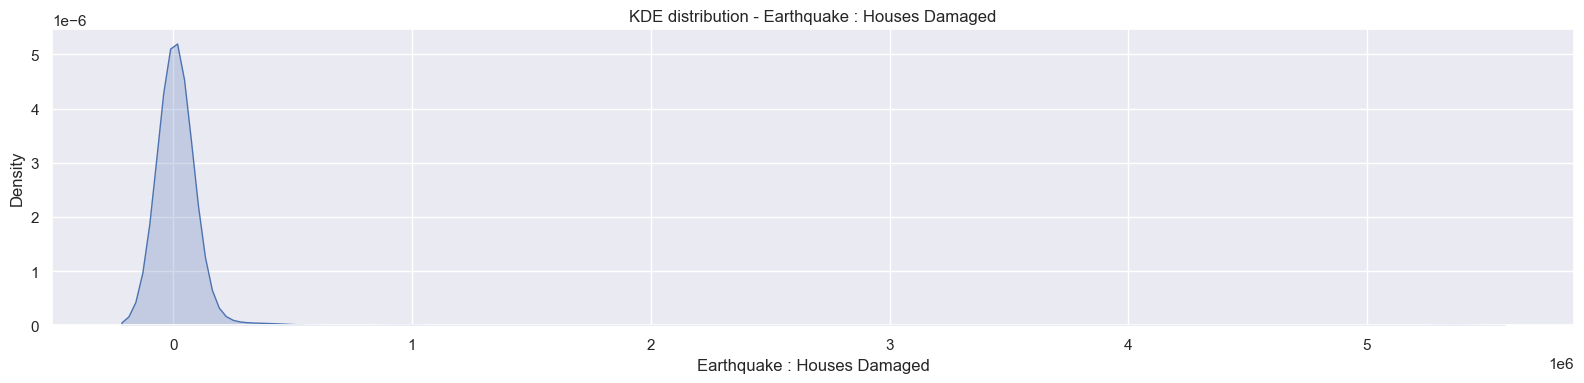

In [100]:
# Plot distributions of numerical data for earthquake effects
def plot_univariate_distributions(df):
    for col in df.columns:
        fig = plt.figure(figsize=(16, 4))
        sns.kdeplot(df[col], fill=True)   
        plt.title(f"KDE distribution - {col}") 
    
    fig.tight_layout()
    plt.show()

print('Plotting univariate distributions')
earthquake_effects_numerical_data = earthquake_effects_data[earthquake_effects_numerical_columns]
plot_univariate_distributions(earthquake_effects_numerical_data)


From these distributions, because of the scale, we can see that all of them have some outliers with very large values. These outliers are probably earthquakes with most damage, deaths and other disasterous effects in history. We will further investigate that later, but for now it is important to notice them.

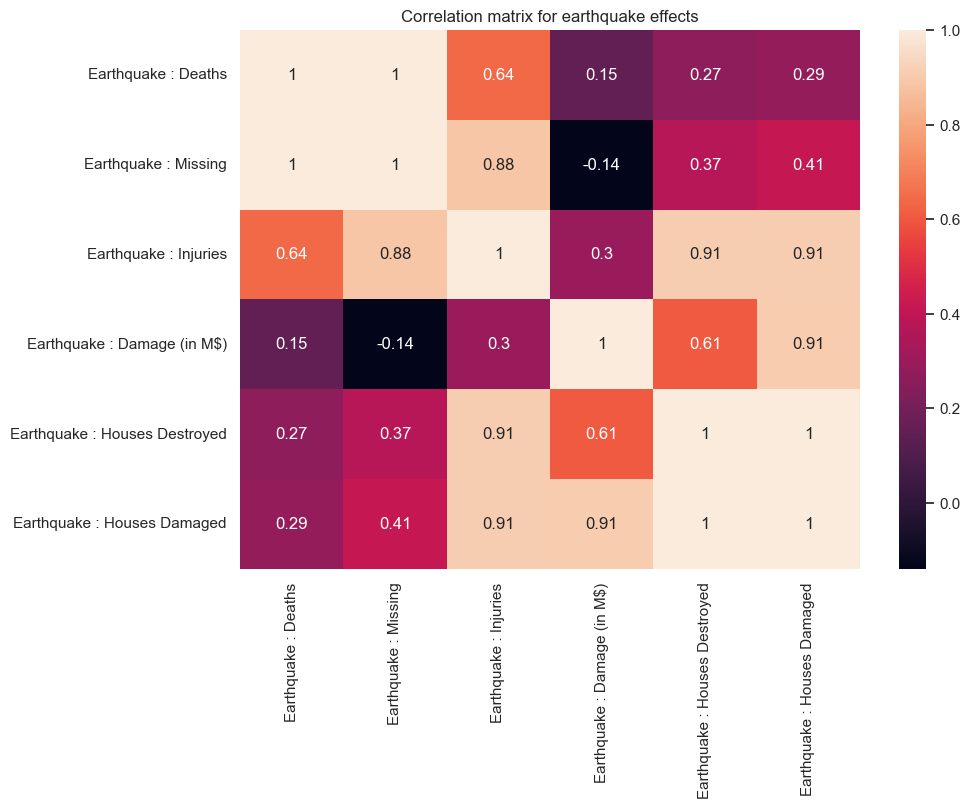

In [101]:
# Correlation between earthquake effects
earthquake_effects_corr_matrix = earthquake_effects_data[earthquake_effects_numerical_columns].corr()
plt.figure(figsize=(10,7))
sns.heatmap(earthquake_effects_corr_matrix, annot=True)
plt.title("Correlation matrix for earthquake effects")
plt.show()

From correlation matrix we can see that number of deaths and missing are perfectly correlated. Combining that with the fact that there are only 21 non-null values of missing people, this column will not be particulary useful. <br>
Number of houses damaged and destroyed are also perfectly correlated and because of that it will probably be enough to retain just one of these columns. <br>
Beside that we can see that number of injuries is highly correlated with damaged and destroyed houses.

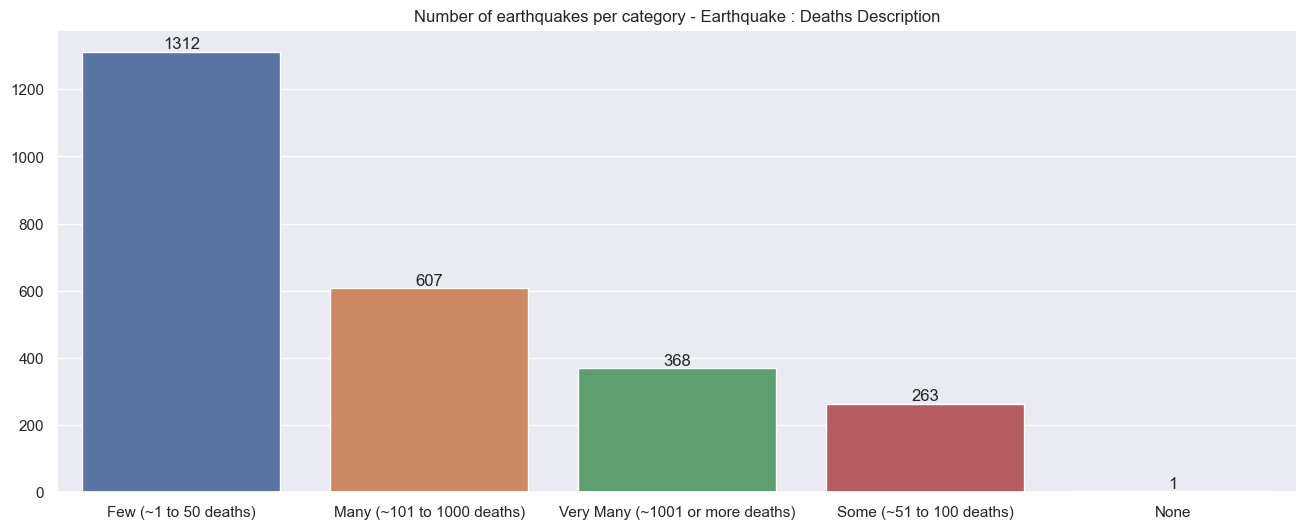

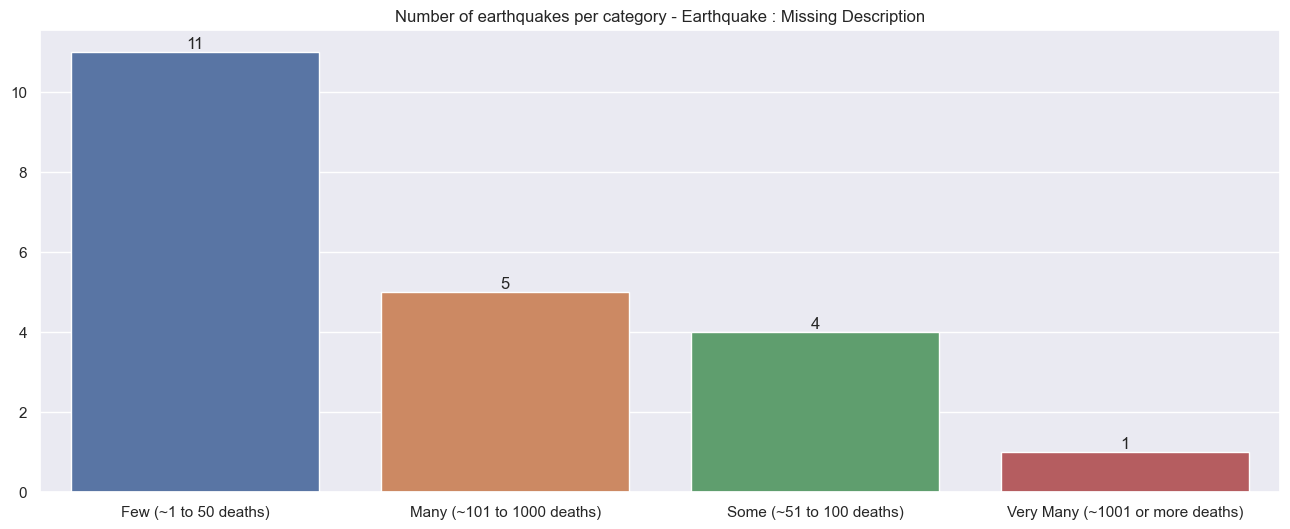

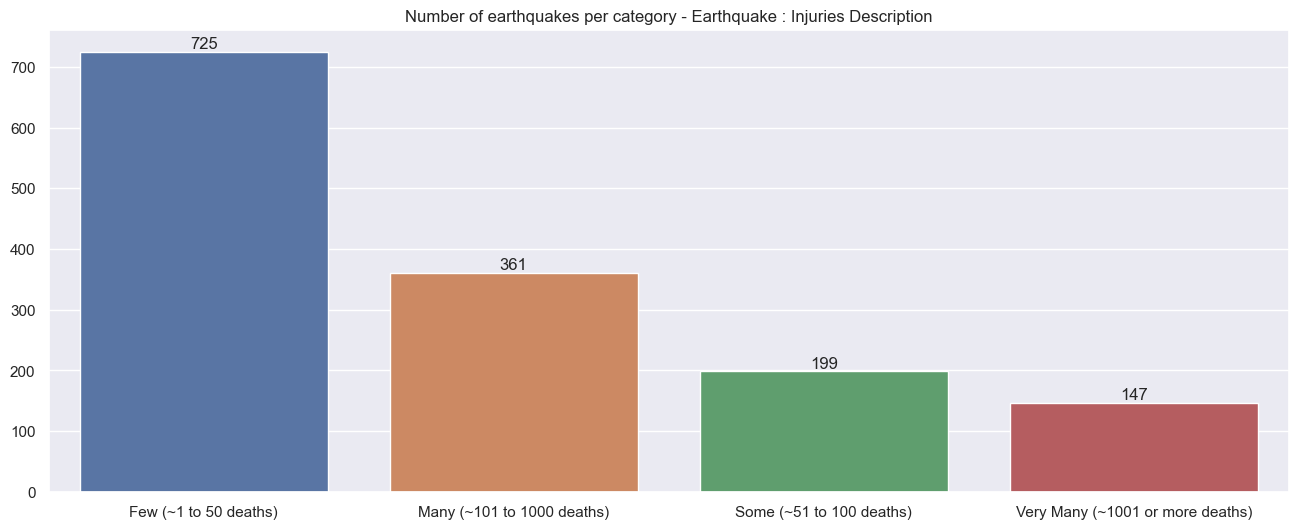

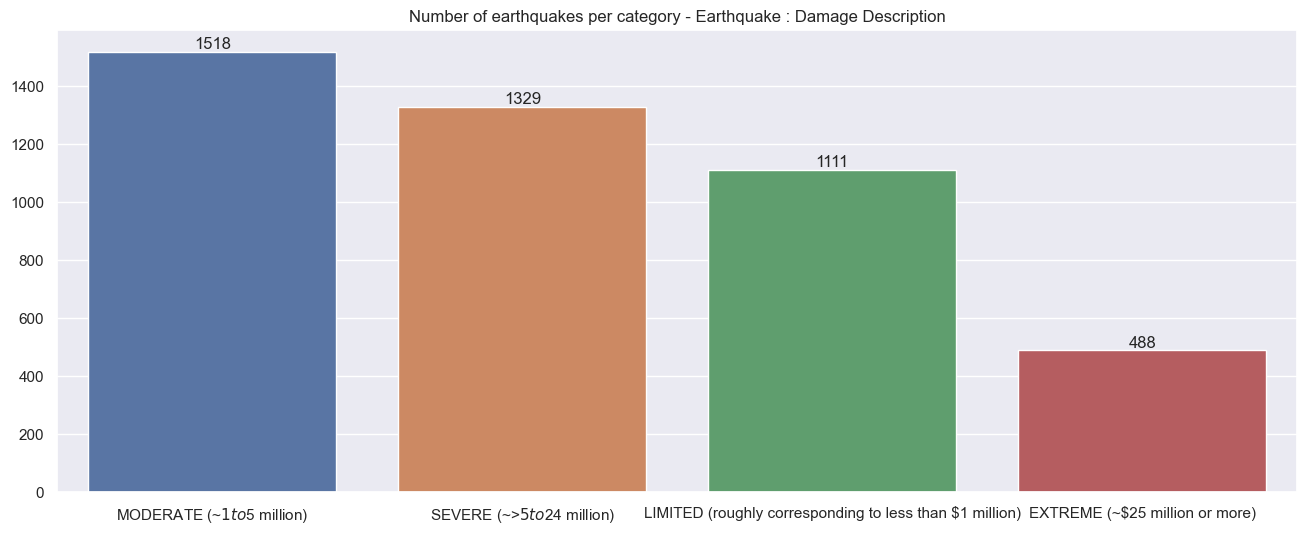

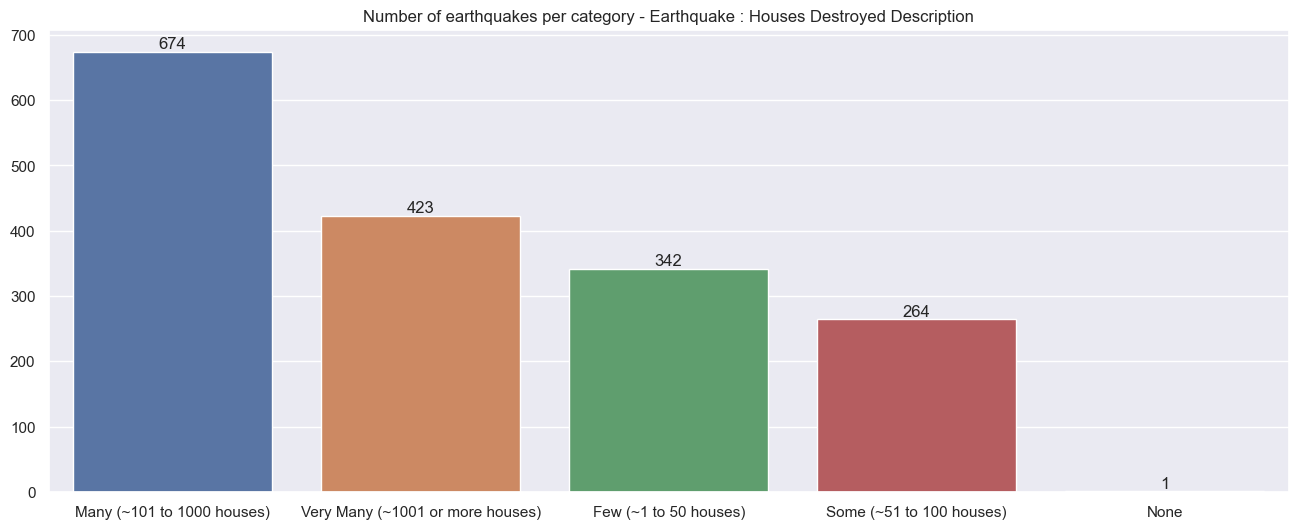

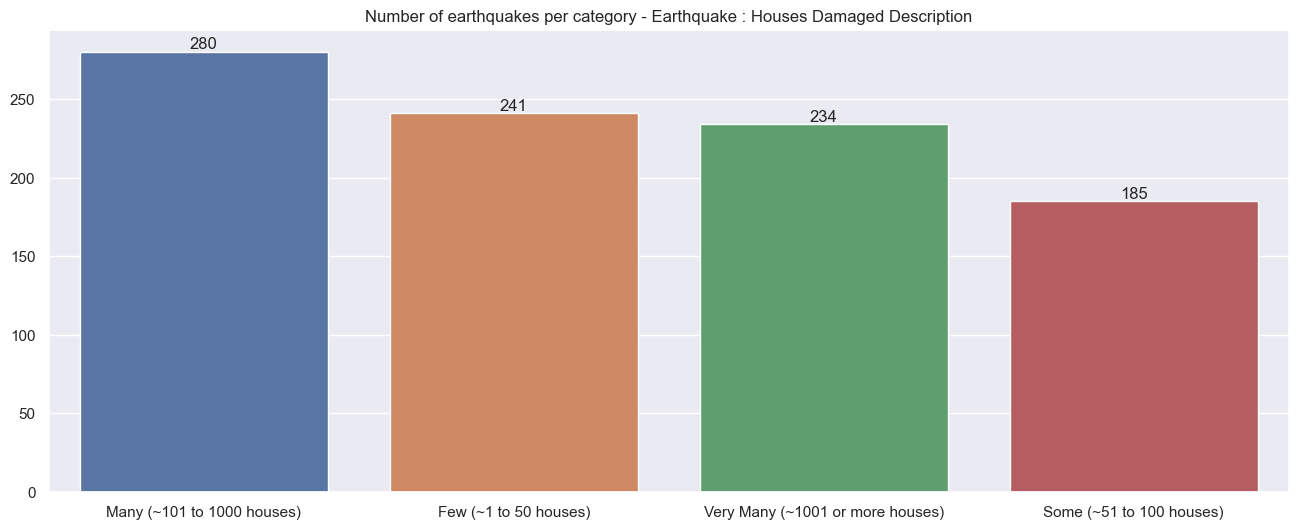

In [102]:
# Categorical data
def plot_categorical(df, col, width=16, height=10):
    group_df = df[col].value_counts()
    sns.set(font_scale=1, rc={"figure.figsize": (width, height)})
    ax = sns.barplot(x=group_df.index, y=group_df.values)
    ax.bar_label(ax.containers[0])
    plt.title(f"Number of earthquakes per category - {col}")
    plt.show()

earthquake_effects_categorical_data = earthquake_effects_data[earthquake_effects_categorical_columns]
for col in earthquake_effects_categorical_columns:
    plot_categorical(earthquake_effects_categorical_data, col, width=16, height=6)

We can see that except damaged and destroyed houses number of earthquakes with more severe effects is less than with moderate and small effects. In these columns we have two None values, whose meaning is not clear yet. These distributions also does not take null values into account (there is a lot of them), so this analysis will be more meaningful when we use only newer data (not in whole history). Then one of the questions is to determine meaning of null values. 

#### Total Effects

We can see that names of columns for total and earhquake effects are same. Because of that, first important question here is to see how much values differ in corresponding columns.

In [103]:
total_effects_numerical_columns = [
    "Total Effects : Deaths",
    "Total Effects : Missing",
    "Total Effects : Injuries",
    "Total Effects : Damage (in M$)",
    "Total Effects : Houses Destroyed",
    "Total Effects : Houses Damaged",
]

total_effects_categorical_columns =  [
    "Total Effects : Deaths Description",
    "Total Effects : Missing Description",
    "Total Effects : Injuries Description",
    "Total Effects : Damage Description",
    "Total Effects : Houses Destroyed Description",
    "Total Effects : Houses Damaged Description"
]

# Renaming column
total_effects_columns = total_effects_numerical_columns + total_effects_categorical_columns
data = data.rename(columns={"Total Effects : Damages in million Dollars": "Total Effects : Damage (in M$)"})
total_effects_data = data[total_effects_columns]

total_effects_data.tail()

,Total Effects : Deaths,Total Effects : Missing,Total Effects : Injuries,Total Effects : Damage (in M$),Total Effects : Houses Destroyed,Total Effects : Houses Damaged,Total Effects : Deaths Description,Total Effects : Missing Description,Total Effects : Injuries Description,Total Effects : Damage Description,Total Effects : Houses Destroyed Description,Total Effects : Houses Damaged Description
ID Earthquake,,,,,,,,,,,,
10245,NaN,NaN,7.0,NaN,1.0,NaN,NaN,NaN,Few (~1 to 50 deaths),LIMITED (roughly corresponding to less than $1...,Few (~1 to 50 houses),Few (~1 to 50 houses)
10267,369.0,NaN,6000.0,8000.000,226.0,184000.0,Many (~101 to 1000 deaths),NaN,Very Many (~1001 or more deaths),EXTREME (~$25 million or more),Many (~101 to 1000 houses),Very Many (~1001 or more houses)
10367,1.0,NaN,NaN,NaN,NaN,NaN,Few (~1 to 50 deaths),NaN,NaN,NaN,NaN,NaN
10430,1.0,NaN,NaN,NaN,NaN,NaN,Few (~1 to 50 deaths),NaN,Few (~1 to 50 deaths),LIMITED (roughly corresponding to less than $1...,NaN,Few (~1 to 50 houses)
10515,1.0,NaN,51.0,0.565,51.0,453.0,Few (~1 to 50 deaths),NaN,Some (~51 to 100 deaths),LIMITED (roughly corresponding to less than $1...,Some (~51 to 100 houses),Many (~101 to 1000 houses)


In [104]:
total_effects_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6208 entries, 78 to 10515
Data columns (total 12 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Total Effects : Deaths                        1702 non-null   float64
 1   Total Effects : Missing                       25 non-null     float64
 2   Total Effects : Injuries                      1259 non-null   float64
 3   Total Effects : Damage (in M$)                456 non-null    float64
 4   Total Effects : Houses Destroyed              817 non-null    float64
 5   Total Effects : Houses Damaged                428 non-null    float64
 6   Total Effects : Deaths Description            2040 non-null   object 
 7   Total Effects : Missing Description           26 non-null     object 
 8   Total Effects : Injuries Description          1441 non-null   object 
 9   Total Effects : Damage Description            3293 non-null  

In [105]:
total_effects_data.describe()

,Total Effects : Deaths,Total Effects : Missing,Total Effects : Injuries,Total Effects : Damage (in M$),Total Effects : Houses Destroyed,Total Effects : Houses Damaged
count,1702.000000,25.00000,1259.000000,456.000000,8.170000e+02,4.280000e+02
mean,4228.737368,1910.68000,2379.995234,1892.290559,1.819171e+04,5.882836e+04
std,28267.559410,8667.79685,27424.400752,12469.580794,1.950541e+05,1.015323e+06
min,1.000000,1.00000,1.000000,0.010000,1.000000e+00,1.000000e+00
25%,3.000000,5.00000,10.000000,4.460000,6.100000e+01,9.000000e+01
50%,20.000000,21.00000,40.000000,29.000000,5.000000e+02,6.465000e+02
75%,289.500000,138.00000,200.000000,292.500000,3.600000e+03,2.850000e+03
max,830000.000000,43476.00000,799000.000000,220085.456000,5.360000e+06,2.100000e+07


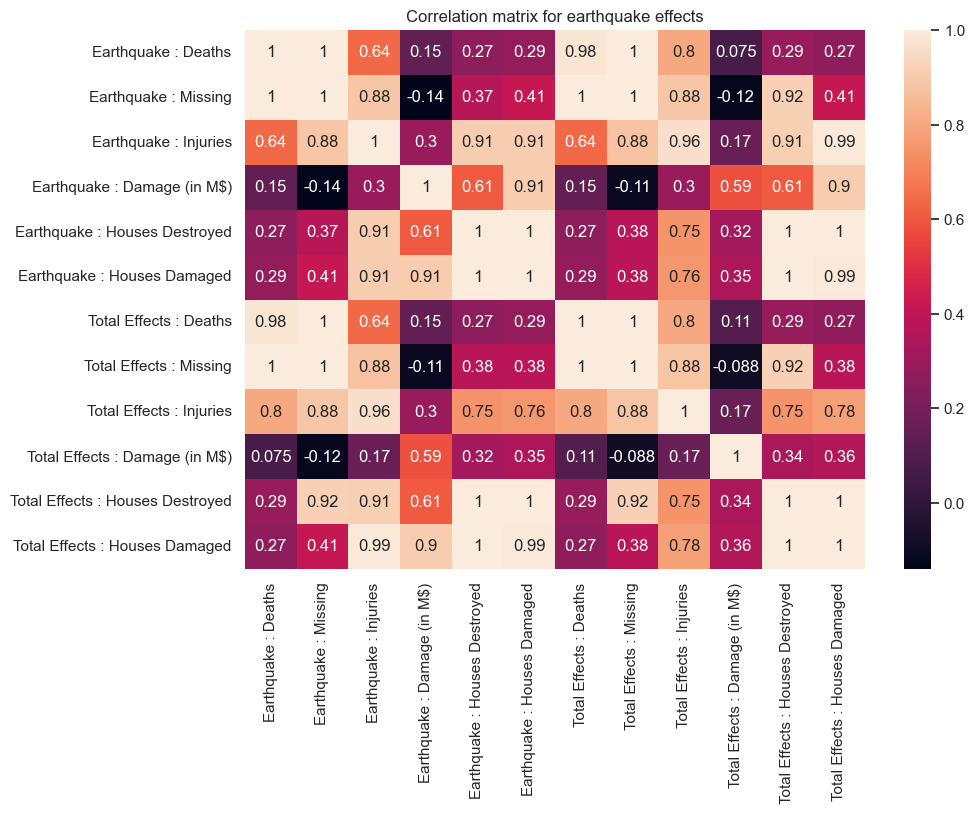

In [106]:
# Determine correlation between earthquake effects and total effects
effects_data = pd.merge(earthquake_effects_data, total_effects_data, left_index=True, right_index=True)
earthquake_effects_corr_matrix = effects_data.corr(numeric_only=True)
plt.figure(figsize=(10,7))
sns.heatmap(earthquake_effects_corr_matrix, annot=True)
plt.title("Correlation matrix for earthquake effects")
plt.show()

Even visualy we can see how this matrix seems symmteric over it's antidiagonal. Correlation values between corresponding columns (earhquake and total effects) are:
<ul>
    <li>Deaths: 0.98</li>
    <li>Missing: 1</li>
    <li>Injuries: 0.96</li>
    <li>Damage (in M$): 0.59</li>
    <li>Haauses Destroyed: 1</li>
    <li>Hausess Damaged: 0.99</li>
</ul>

So except Damage (in M$) column other pairs of clumns are very highly correlated and there is no point on analysisng both earthquake and total effects separately for numerical columns.

In [107]:
print("Mean values by columns")
for i in range(len(earthquake_effects_numerical_columns)):
    col1 = earthquake_effects_numerical_columns[i]
    col2 = total_effects_numerical_columns[i]
    print(f"{col1} -> {earthquake_effects_data[col1].mean()}, {col2} -> {total_effects_data[col2].mean()}")

Mean values by columns
Earthquake : Deaths -> 3748.109714838086, Total Effects : Deaths -> 4228.737367802585
Earthquake : Missing -> 2182.7619047619046, Total Effects : Missing -> 1910.68
Earthquake : Injuries -> 2173.5844051446948, Total Effects : Injuries -> 2379.9952343129466
Earthquake : Damage (in M$) -> 1252.0898943248533, Total Effects : Damage (in M$) -> 1892.2905592105262
Earthquake : Houses Destroyed -> 17623.946564885497, Total Effects : Houses Destroyed -> 18191.71481028152
Earthquake : Houses Damaged -> 25133.18775510204, Total Effects : Houses Damaged -> 58828.35514018692


So here, we can see that for almost all columns (except missing which has a lot of null values), total effects have bigger values (which is expected).

In [108]:
print("Jaccard similarity for categorical columns")
for i in range(len(earthquake_effects_categorical_columns)):
    col1 = earthquake_effects_categorical_columns[i]
    col2 = total_effects_categorical_columns[i]
    values1 = earthquake_effects_data[col1].dropna()
    values2 = total_effects_data[col2].dropna()
    # Jaccard similarity works only for non null values, so we need to extract the values that appera in both columns
    idx = set(values1.index).intersection(set(values2.index))
    idx = sorted(list(idx))
    # Calculate the Jaccard similarity between the two columns
    jaccard_similarity = jaccard_score(earthquake_effects_data[col1].loc[idx], total_effects_data[col2].loc[idx], average='weighted')
    print(f"{col1}, {col2} -> {jaccard_similarity}")

Jaccard similarity for categorical columns
Earthquake : Deaths Description, Total Effects : Deaths Description -> 0.9559331290243338
Earthquake : Missing Description, Total Effects : Missing Description -> 0.9035087719298246
Earthquake : Injuries Description, Total Effects : Injuries Description -> 0.9859108466575434
Earthquake : Damage Description, Total Effects : Damage Description -> 0.9573823255610486
Earthquake : Houses Destroyed Description, Total Effects : Houses Destroyed Description -> 0.9513708535574468
Earthquake : Houses Damaged Description, Total Effects : Houses Damaged Description -> 0.9309467061931035


This confrims that categorical column representatives of these groups are very highly correlated. <br>
We will retain only one of these two groups for further analysis.

### Null Values, Row and Column Selection

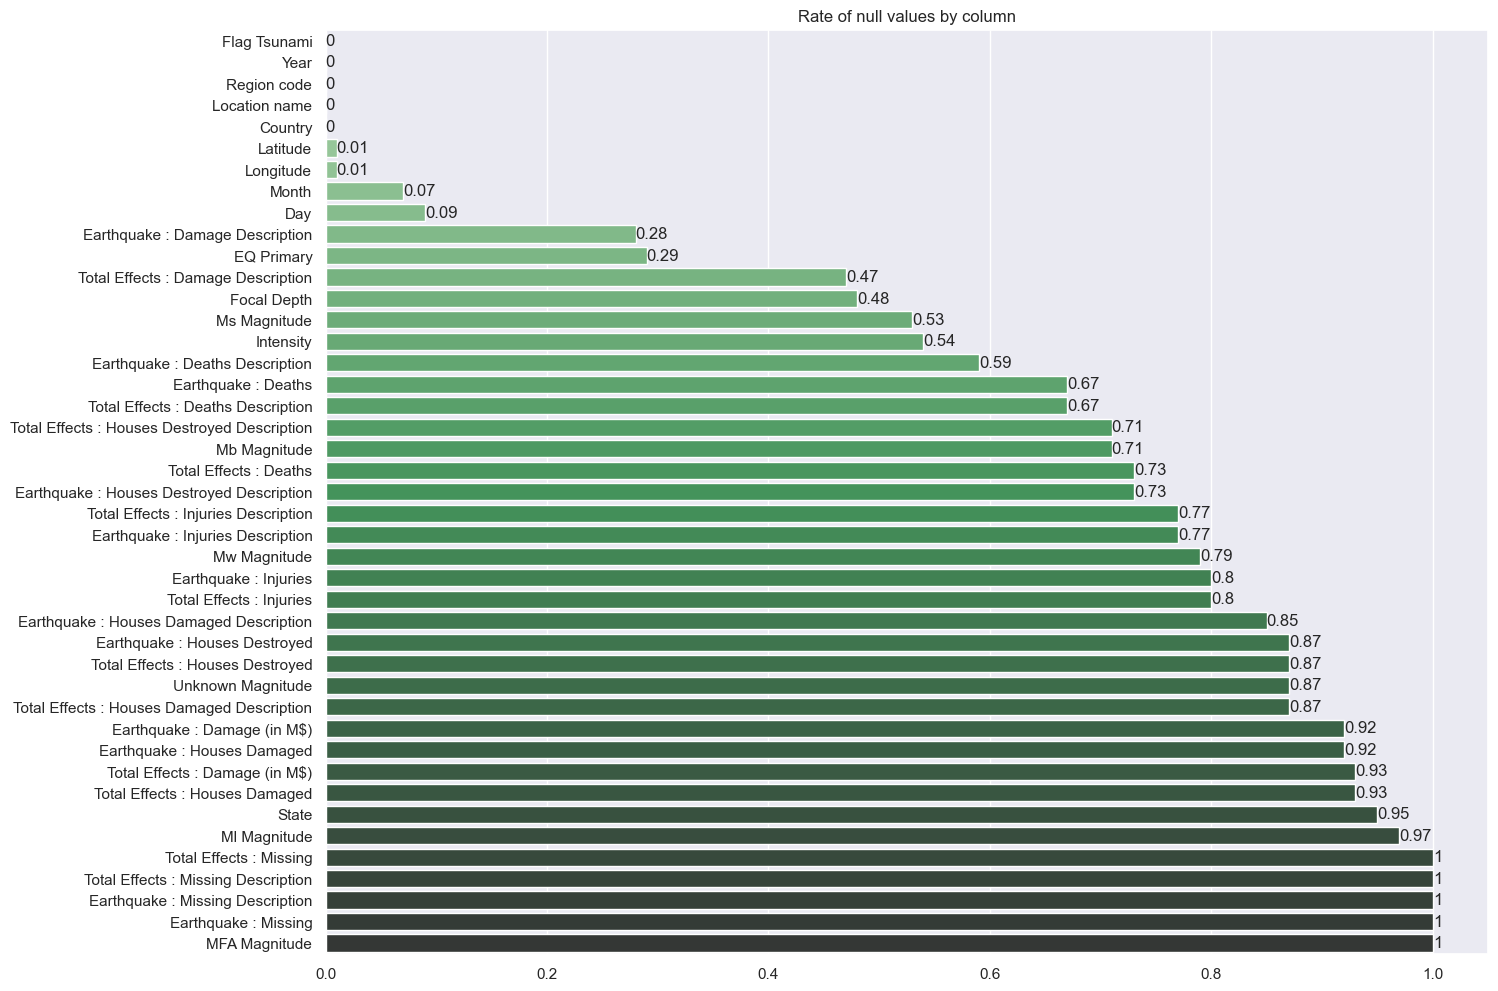

In [109]:
def null_values_by_columns(df):
    null_counts = round(df.isnull().sum() / df.shape[0], 2)
    null_counts = null_counts.sort_values()
    sns.set(font_scale=1, rc={"figure.figsize": (15, 12)})
    ax = sns.barplot(x=null_counts.values, y=null_counts.index, palette="Greens_d")
    ax.bar_label(ax.containers[0])
    plt.title("Rate of null values by column")
    plt.show()
null_values_by_columns(data)

From basic info category flag tsunami and EQ Primary columns will definetely stay in dataset.
We have around 50% of null values for focal depth and intensity of earthquakes. Because later we will also drop a lot rows, we will decide later what to do with these columns.

For location columns we will drop region code although we have all data available (there are only 18 distinct values and focus in analysis will be on countries).
State column will be retained only for analysis of earthquakes in USA.
Location name, will be retained along with countries and latitude and longitude data.

We can see that all data related to date when earthquakes happened are usually present, so these columns will be retained.

For magnitudes we will retain only EQ Primary column, because of reasons given above.

From the chart above we can see that there are more available data for earthquake effects than total effects. Because of that we will retain earthquake effects columns for further analysis and drop total effects columns.


In [110]:
columns_to_drop = [
    "Region code",
    "Mw Magnitude", 
    "Ms Magnitude",
    "Mb Magnitude",
    "Ml Magnitude", 
    "MFA Magnitude",
    "Unknown Magnitude",
    "Total Effects : Deaths",
    "Total Effects : Missing",
    "Total Effects : Injuries",
    "Total Effects : Damage (in M$)",
    "Total Effects : Houses Destroyed",
    "Total Effects : Houses Damaged",
    "Total Effects : Deaths Description",
    "Total Effects : Missing Description",
    "Total Effects : Injuries Description",
    "Total Effects : Damage Description",
    "Total Effects : Houses Destroyed Description",
    "Total Effects : Houses Damaged Description"
]

data = data.drop(columns=columns_to_drop)
print(f"Dataset rows: {data.shape[0]}, columns: {data.shape[1]}")
data.head(10)

Dataset rows: 6208, columns: 24


,Flag Tsunami,Year,Month,Day,Focal Depth,EQ Primary,Intensity,Country,State,Location name,...,Earthquake : Injuries,Earthquake : Injuries Description,Earthquake : Damage (in M$),Earthquake : Damage Description,Earthquake : Houses Destroyed,Earthquake : Houses Destroyed Description,Earthquake : Houses Damaged,Earthquake : Houses Damaged Description,Latitude,Longitude
ID Earthquake,,,,,,,,,,,,,,,,,,,,,
78,False,334,<NA>,<NA>,NaN,NaN,10.0,ALBANIA,NaN,ALBANIA: DURRES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.2,19.3
84,True,344,<NA>,<NA>,NaN,NaN,9.0,TURKEY,NaN,TURKEY: DARDANELLES,...,NaN,NaN,NaN,SEVERE (~>$5 to $24 million),NaN,NaN,NaN,NaN,40.3,26.5
9989,True,346,<NA>,<NA>,NaN,6.8,9.0,ALBANIA,NaN,ALBANIA: DURRES (DYRRACHIUM),...,NaN,NaN,NaN,MODERATE (~$1 to $5 million),NaN,Many (~101 to 1000 houses),NaN,NaN,41.4,19.4
110,False,438,<NA>,<NA>,NaN,NaN,10.0,GREECE,NaN,GREECE: CRETE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.5,25.5
9971,True,557,<NA>,<NA>,NaN,7.0,9.0,TURKEY,NaN,TURKEY: ISTANBUL (CONSTANTINOPLE),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.9,27.6
172,False,742,<NA>,<NA>,NaN,NaN,NaN,SYRIA,NaN,SYRIA; ISRAEL; ASIA,...,NaN,NaN,NaN,SEVERE (~>$5 to $24 million),NaN,NaN,NaN,NaN,35.0,38.0
209,False,845,9,6,NaN,NaN,NaN,IRAQ,NaN,IRAQ: AL-MAWSIL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.2,43.1
7261,False,1118,<NA>,<NA>,NaN,NaN,NaN,UK,NaN,UNITED KINGDOM: IRELAND: SLIABH-ELPA,...,NaN,NaN,NaN,EXTREME (~$25 million or more),NaN,NaN,NaN,NaN,NaN,NaN
411,False,1155,<NA>,<NA>,NaN,NaN,NaN,SYRIA,NaN,SYRIA: DIMASHQ; TURKEY:ANTIOCH; LEBANON:TARAB...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.5,36.5


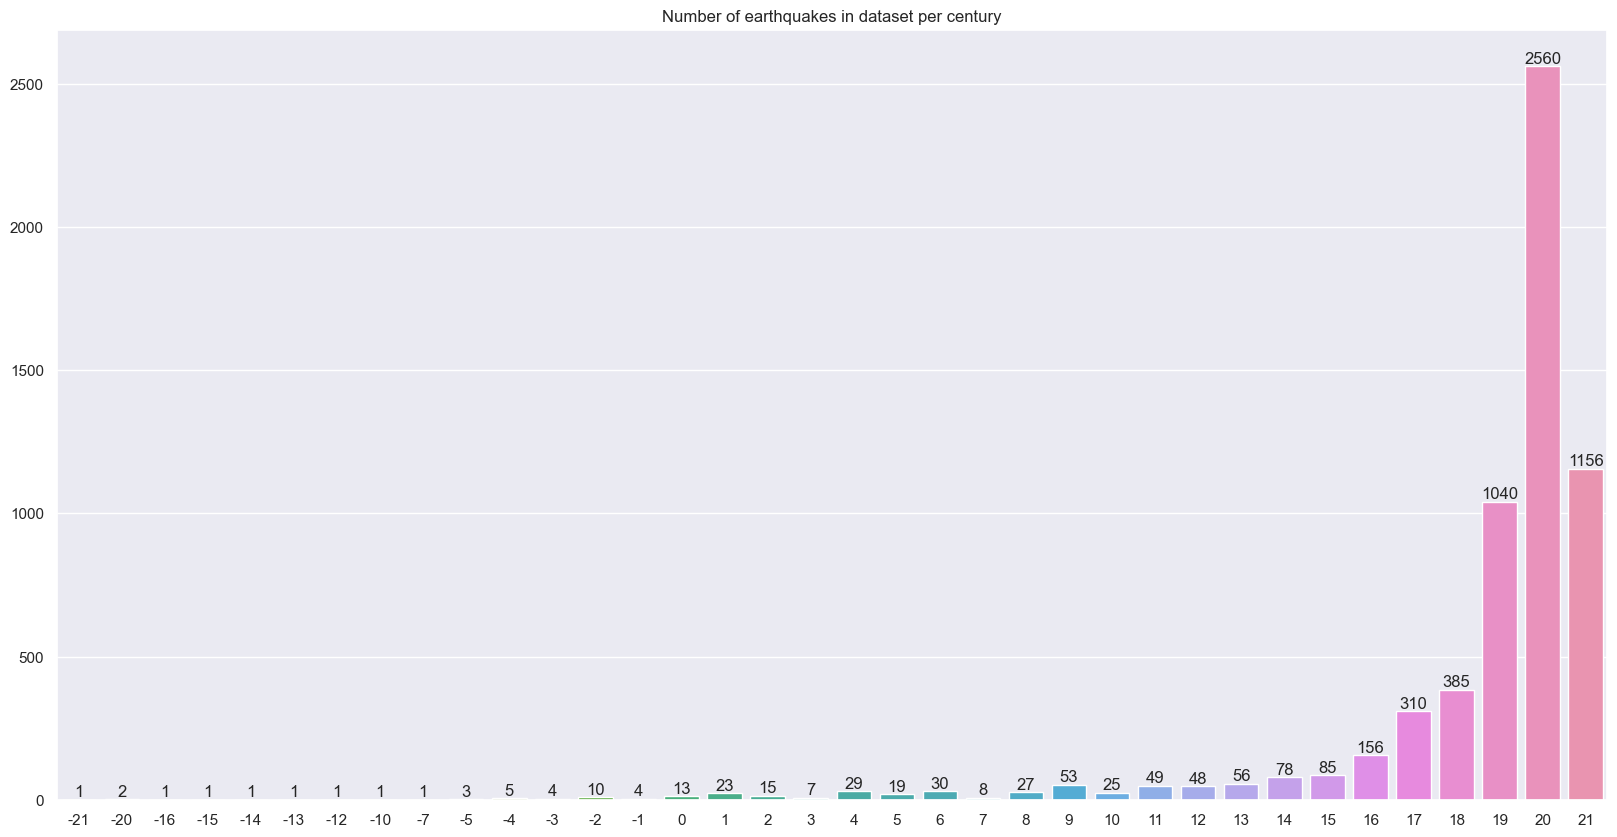

In [111]:
# Count number of recorded significant earthquakes per century
century = ((data["Year"] - 1) // 100 + 1).value_counts().sort_index()
sns.set(font_scale=1, rc={"figure.figsize": (20, 10)})
ax = sns.barplot(x=century.index, y=century.values)
ax.bar_label(ax.containers[0])
plt.title("Number of earthquakes in dataset per century")
plt.show()

We can see that there is very small amount of earthquakes recorded before 19th century. Because of that in order to have more consistent analysis we will drop from dataset all earthquakes that happended before that period.

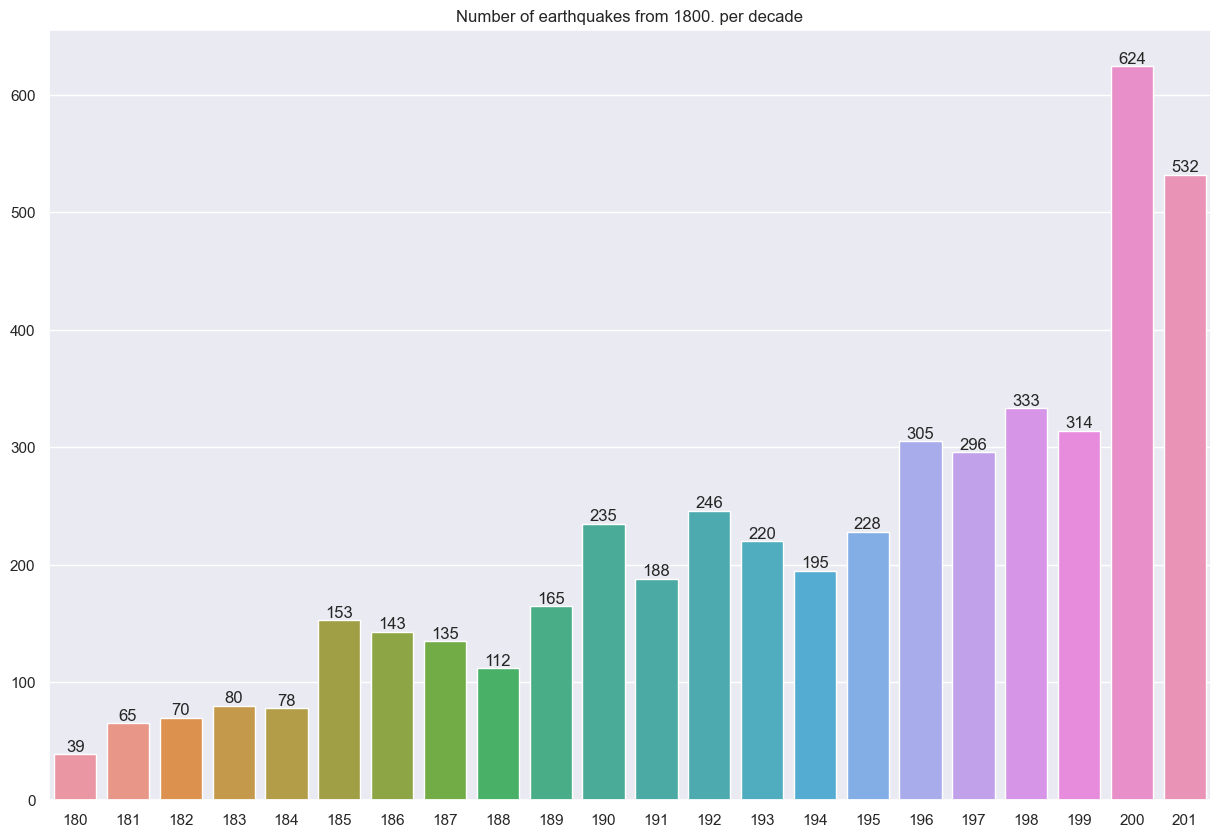

In [112]:
# Count number of recorded significant earthquakes per decade from 1800
data = data[data["Year"] > 1800]
decades = ((data["Year"] - 1) // 10).value_counts().sort_index()
sns.set(font_scale=1, rc={"figure.figsize": (15, 10)})
ax = sns.barplot(x=decades.index, y=decades.values)
ax.bar_label(ax.containers[0])
plt.title("Number of earthquakes from 1800. per decade")
plt.show()

Again we can see steady increase of recorded earthquakes over decades from 19th to 21st century. Question is why is that happening? One of the certain reasons is that with development of technologies our recordings of different factors of earthquakes are more accurate. Let's see what of the 5 reasons (caused deaths, more than 1 million dollars damage, magnitude 7.5 or greater, intensity 10 or more, genarated tsunami) was most common and how that distribution changes over decades.

<AxesSubplot: title={'center': 'Number of earthquakes per decade grouped by satisfied conditions'}, xlabel='Decade'>

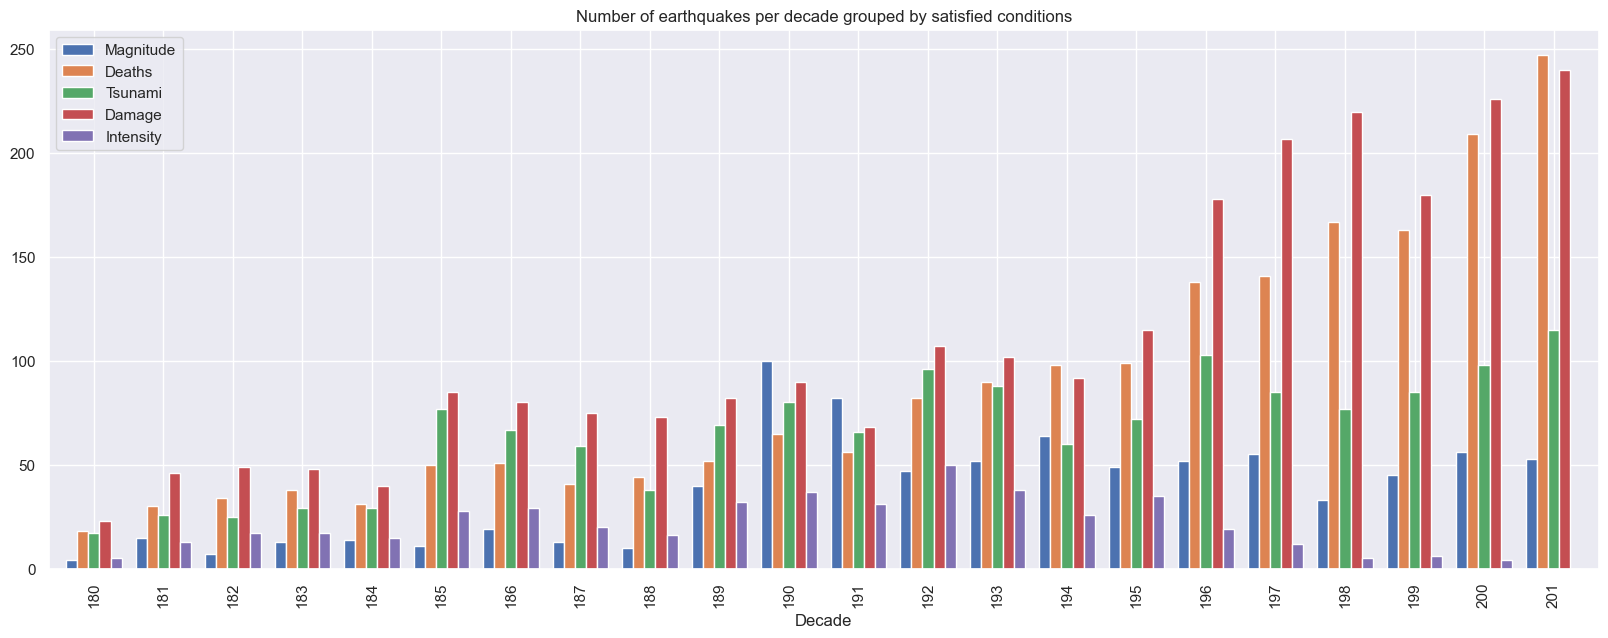

In [170]:

satisfies_magnitude = data["EQ Primary"] >= 7.5
satisfies_deaths = (data["Earthquake : Deaths"] > 0) | ~(data["Earthquake : Deaths Description"].isna())
satisfies_tsunami = data["Flag Tsunami"]
satisfies_damage = (data["Earthquake : Damage (in M$)"] > 1) | \
    (data["Earthquake : Damage Description"] == "MODERATE (~$1 to $5 million)") | \
    (data["Earthquake : Damage Description"] == "SEVERE (~>$5 to $24 million)") | \
    (data["Earthquake : Damage Description"] == "EXTREME (~$25 million or more)")
satisfies_intensity = data["Intensity"] >= 10

conditions = pd.concat([satisfies_magnitude, satisfies_deaths, satisfies_tsunami, satisfies_damage, satisfies_intensity], axis=1)
conditions.columns = ["Magnitude", "Deaths", "Tsunami", "Damage", "Intensity"]

decade_conditions = pd.concat([(data["Year"] - 1) // 10, conditions], axis=1)
decade_conditions.rename(columns={"Year": "Decade"}, inplace=True)
decade_conditions.groupby("Decade").sum().plot(kind="bar", figsize=(20, 7), width=0.8, title="Number of earthquakes per decade grouped by satisfied conditions")

Main takeaway here is that earthquakes that have enough damage or number of deaths to be classified as significant increased a lot in more recent decades.
We can see that magnittude and intensity caused more earthquakes to be significant in some past decades (peek around 1900. year), so they did not contributed the trend of
increasing number of significant earthquakes.
We can also observe that number of tsunamis as a couse in most of decades (from 1850. to now) did not changed a lot.

With this we can conclude that there are more earthquakes recorded in this dataset in recent past, because earthqukes now cause more damage and deaths (at least recorded ones).
This can be due to more advanced technology that alows better tracking of material damage and deaths in earthquakes, but also due to more people and cities in areas that are prone to earthquakes.